In [4]:
#Lineer regresyon Üzerinde gürültünün etkisinin incelenmesi

# Diziler üzerinde matematiksel işlemler gerçekleştirmek için geliştirilmiş bir
# Python kütüpanedir. Matrisler, cebirsel işlemler bu kütüpanede tanımlı
# fonksiyonlar ile gerçekleştirilebilir. Bilimsel hesaplamalarda tercih edilen
# temel bir kütüphandir.
import numpy as np
from numpy import random

# Dizi olarak giriş ve çıkış verilerini oluşturalım
# reshape((-1, 1)) sütün vektörüne dönüştürür.
x = np.array([5, 15, 25, 35, 45, 55])
# Veriyi üretan orjinal sistem modeli. Amacımız lineer regresyon modelinin
# gürültülü veri durumunda bu sistem modeline yakınsaması
y_org = 2*x+3
# reshape((-1, 1)) sütün vektörüne dönüştürür.
x = x.reshape((-1, 1))
#y_org = np.array([5, 20, 14, 32, 22, 38])

# 0-10 aralığında rastgele gürültü (residual) işareti üretelim
GurultuBuyukluk=10
n = random.randint(GurultuBuyukluk, size=(6))-(GurultuBuyukluk/2)
# Ölçülen işaret modeli.
y=y_org+n;
print ("Giriş:",x)
print ("Sistem Çıkışı:",y_org)
print ("Eklenen Gürültü:",n)
print ("Ölçülen Çıkış (y_org+n):",y)



Giriş: [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Sistem Çıkışı: [ 13  33  53  73  93 113]
Eklenen Gürültü: [ 2.  0. -2.  4. -1.  2.]
Ölçülen Çıkış (y_org+n): [ 15.  33.  51.  77.  92. 115.]


Gürültülü veri için R^2 score:  0.9965130073295403
----

Orjinal bilgi işareti için R^2 score:  0.9993863945578231
----

Model: y=b1*x+b0
b0: 3.576190476190483
b1: [2.00857143]
Tahmin [17.63619048 33.7047619 ]


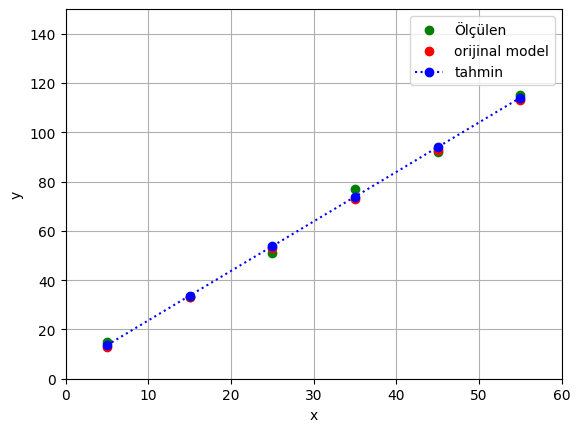

****** Regresyon Performas Öçütleri*******
Ortalama karesel hata 0.7158730158730224
Ortalama mutlak hata 0.8333333333333377
Ortalama mutlak yüzde hata 0.019251125053470007
R^2-score 0.9993863945578231


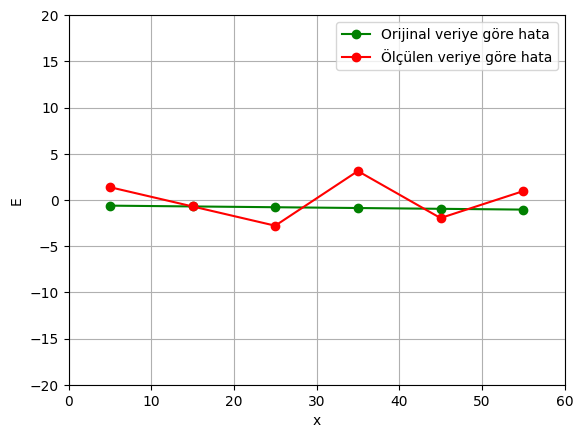

In [5]:
# Burada sklearn makine öğrenmesi kütüpanesinden LineerRegresyon kullanılıyor.
# Sonuçların grafik gösterimi için matplotlib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Regresyon modelinin "model" ismi oluşturulması
model = LinearRegression()
# Regresyon modelinin eğitimi (En küçük kareler yöntemi ile)
model.fit(x, y)

# R^2 skore modelin veriyi temsil durumunu ölçer.
# 1 ise %100 yani hatasız bütün verileri temsil ettiği anlamına gelir.
# Aşağıdaki satırda y göre hesaplama ölçülen gürültülü veriyi temsil durumu
r_sq = model.score(x, y)
print('Gürültülü veri için R^2 score: ',r_sq)
print('----\n')
# Aşağıdaki satırda y_org göre hesaplama istenen orjinal sistem verisini
# (bilgi işareti) temsil durumu
r_squared_org = model.score(x,y_org)
print('Orjinal bilgi işareti için R^2 score: ',r_squared_org)
print('----\n')

# Tahmin edilen modelin katsayılarının alınması
print(f"Model: y=b1*x+b0")
print(f"b0: {model.intercept_}")
print(f"b1: {model.coef_}")

# x= 7 ve x= 15 değerleri için modelin tahmini hesaplayalım.
x_yeni=np.array([7, 15]).reshape(-1,1)
y_pred = model.predict(x_yeni)
print('Tahmin',y_pred)

# Bütün eğitik kümesi için tahmin hesaplayalım.
y_predx = model.predict(x)

# orjinal sistem çıkşını (y_org), gürültülü veri ölçümünü (y) ve modelin
# tahminini çizelim.
plt.plot(x,y,'o g')
plt.plot(x,y_org,'o r')
plt.plot(x,y_predx ,'o:b')
plt.ylim(ymin=0, ymax=150)
plt.xlim(xmin=0, xmax=60)
plt.xlabel("x")
plt.ylabel ("y")
plt.legend(['Ölçülen', 'orijinal model', 'tahmin'])
plt.grid()
plt.show()

# Regresyon performans ölçütlerini hesaplayalım
# Veri başına orjinal sistem modeli çıkışına göre hata
# Amacımız, tahmin modelinin gürültüyü ihmal ederek orijinal model yaklaşması
# bu nedenle E_org hatasının düşük olmasını istiyoruz.
E_org=y_org-y_predx
# Veri başına gürültülü veri ölçümüne göre model çıkışı hatası
# Gürültülü durumda E değeri daha küçük olursa gürültünün ezberlenmesi
# (aşırı öğrenme) anlamına gelir.
E=y-y_predx
E_sq=(1/len(E_org))*sum(E_org*E_org)
E_abs=(1/len(E_org))*sum(abs(E_org))
E_mape=(1/len(E_org))*sum(abs(E_org)/abs(y_org))
r_squared_org = model.score(x,y_org)
print('****** Regresyon Performas Öçütleri*******')
print('Ortalama karesel hata',E_sq)
print('Ortalama mutlak hata',E_abs)
print('Ortalama mutlak yüzde hata',E_mape)
print('R^2-score',r_squared_org)

# Tha
plt.plot(x,E_org,'o-g')
plt.plot(x,E,'o-r')
plt.ylim(ymin=-20, ymax=20)
plt.xlim(xmin=0, xmax=60)
plt.xlabel("x")
plt.ylabel ("E")
plt.legend(['Orijinal veriye göre hata', 'Ölçülen veriye göre hata'])
plt.grid()
plt.show()
